Task 2: Data Cleaning & Missing Value Handling

1.Load dataset and identify missing values using .isnull().sum()

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Medical App.csv")
df.head()
df.shape
missing_before = df.isnull().sum()
missing_before
print("Total missing values:", missing_before.sum())


Total missing values: 245


2.Visualize missing data patterns using simple bar charts

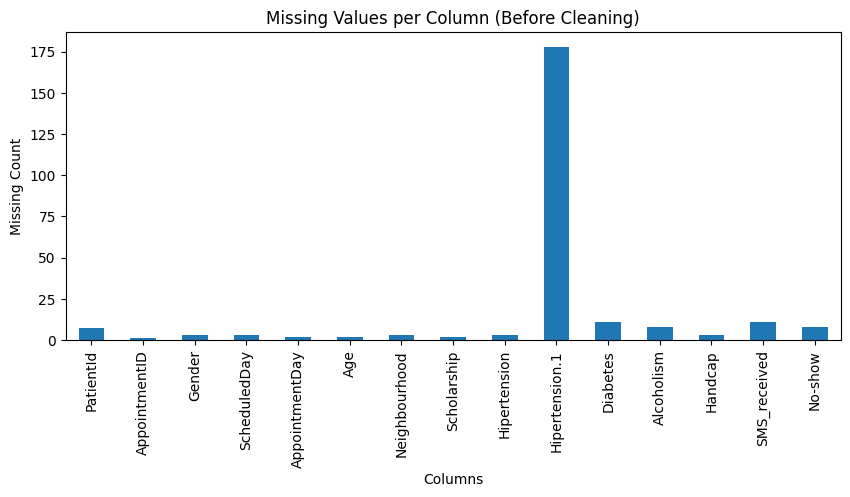

In [134]:
plt.figure(figsize=(10,4))
missing_before.plot(kind='bar')
plt.title("Missing Values per Column (Before Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.show()
df_cleaned = df.copy()


Identify numerical & categorical columns

In [135]:
num_cols = df_cleaned.select_dtypes(include='number').columns
cat_cols = df_cleaned.select_dtypes(include='object').columns
print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))
for col in num_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

Numerical Columns: ['PatientId', 'AppointmentID', 'Age', 'Scholarship', 'Hipertension', 'Hipertension.1', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
Categorical Columns: ['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show']


3. Apply mean/median imputation for numerical columns.
4. Apply mode imputation for categorical columns.

In [136]:
for col in num_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
for col in cat_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
    

In [ ]:
5.Remove columns with extremely high missing values.

In [137]:
threshold = len(df_cleaned) * 0.99   
df_cleaned = df_cleaned.dropna(axis=1, thresh=threshold)

In [ ]:
Removing Duplicate Rows

In [138]:
duplicates_before = df.duplicated().sum()
df_cleaned = df_cleaned.drop_duplicates()
duplicates_after = df_cleaned.duplicated().sum()

print("Duplicates before cleaning:", duplicates_before)
print("Duplicates after cleaning:", duplicates_after)


Duplicates before cleaning: 10
Duplicates after cleaning: 0


6.Validate dataset after cleaning.

In [139]:
print("Missing values after cleaning:", df_cleaned.isnull().sum().sum())
df_cleaned.info()

Missing values after cleaning: 0
<class 'pandas.core.frame.DataFrame'>
Index: 110517 entries, 0 to 110516
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110517 non-null  float64
 1   AppointmentID   110517 non-null  float64
 2   Gender          110517 non-null  object 
 3   ScheduledDay    110517 non-null  object 
 4   AppointmentDay  110517 non-null  object 
 5   Age             110517 non-null  float64
 6   Neighbourhood   110517 non-null  object 
 7   Scholarship     110517 non-null  float64
 8   Hipertension    110517 non-null  float64
 9   Hipertension.1  110517 non-null  float64
 10  Diabetes        110517 non-null  float64
 11  Alcoholism      110517 non-null  float64
 12  Handcap         110517 non-null  float64
 13  SMS_received    110517 non-null  float64
 14  No-show         110517 non-null  object 
dtypes: float64(10), object(5)
memory usage: 13.5+ MB


7.Compare before vs after dataset size and quality.

In [140]:
quality = pd.DataFrame({
    "Before Cleaning": [
        df.shape[0],
        df.shape[1],
        df.isnull().sum().sum(),
        df.duplicated().sum()
    ],
    "After Cleaning": [
        df_cleaned.shape[0],
        df_cleaned.shape[1],
        df_cleaned.isnull().sum().sum(),
        df_cleaned.duplicated().sum()
    ]
}, index=[
    "Number of Rows",
    "Number of Columns",
    "Missing Values",
    "Duplicate Rows"
])

quality


,Before Cleaning,After Cleaning
Number of Rows,110527,110517
Number of Columns,15,15
Missing Values,245,0
Duplicate Rows,10,0
